In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"H:\New folder\car_purchasing.csv",encoding='ISO-8859-1')

df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.drop(columns=['customer name','customer e-mail','country'],inplace=True)

In [5]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
df.columns

Index(['gender', 'age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of      gender        age  annual Salary  credit card debt    net worth  \
0         0  41.851720    62812.09301      11609.380910  238961.2505   
1         0  40.870623    66646.89292       9572.957136  530973.9078   
2         1  43.152897    53798.55112      11160.355060  638467.1773   
3         1  58.271369    79370.03798      14426.164850  548599.0524   
4         1  57.313749    59729.15130       5358.712177  560304.0671   
..      ...        ...            ...               ...          ...   
495       0  41.462515    71942.40291       6995.902524  541670.1016   
496       1  37.642000    56039.49793      12301.456790  360419.0988   
497       1  53.943497    68888.77805      10611.606860  764531.3203   
498       1  59.160509    49811.99062      14013.034510  337826.6382   
499       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.7

In [9]:
df.isnull().any()

gender                 False
age                    False
annual Salary          False
credit card debt       False
net worth              False
car purchase amount    False
dtype: bool

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [11]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [12]:
x=df.drop("car purchase amount",axis=1)#features
y=df[["car purchase amount"]]#target

In [13]:
y

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248
...,...
495,48901.44342
496,31491.41457
497,64147.28888
498,45442.15353


In [14]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Fit MinMaxScaler on x (features)
scaler = MinMaxScaler()
x = scaler.fit_transform(x)  # Fit on x (which has 5 features)

# Save the correctly trained input scaler
joblib.dump(scaler, 'scalerui.pkl')

# Ensure y is converted to a NumPy array
y = y.to_numpy()

# Save the y-scaler and transform y
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1))

# Save the y-scaler for later use in deployment
joblib.dump(y_scaler, 'y_scalerui.pkl')

# Print to check
print("Input Scaler expects:", scaler.n_features_in_)  # Should print 5


Input Scaler expects: 5


In [15]:
x

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [16]:
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [17]:
import joblib
import numpy as np

scaler = joblib.load("scalerui.pkl")  # Load the scaler
sample_input = np.array([[1, 40, 60000, 700, 200000]])  # Sample data

# Ensure the input has the correct shape before transformation
sample_input_scaled = scaler.transform(sample_input)  # Should return a 2D scaled array
print("Scaled Sample Input:", sample_input_scaled) # Should return a 2D scaled array


Scaled Sample Input: [[1.         0.4        0.5        0.03015075 0.18367347]]


In [18]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.2,shuffle=True)

In [19]:
model=Sequential([
    Dense(25,activation='relu',input_dim=5),
    Dense(18,activation='relu'),
    Dense(1,activation='linear',)])
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637 (2.49 KB)

 Trainable params: 637 (2.49 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.2717 - val_loss: 0.1975
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1583 - val_loss: 0.0978
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0737 - val_loss: 0.0431
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0353 - val_loss: 0.0269
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0363 - val_loss: 0.0207
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0262 - val_loss: 0.0158
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0165 - val_loss: 0.0134
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - val_loss: 0.0109
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

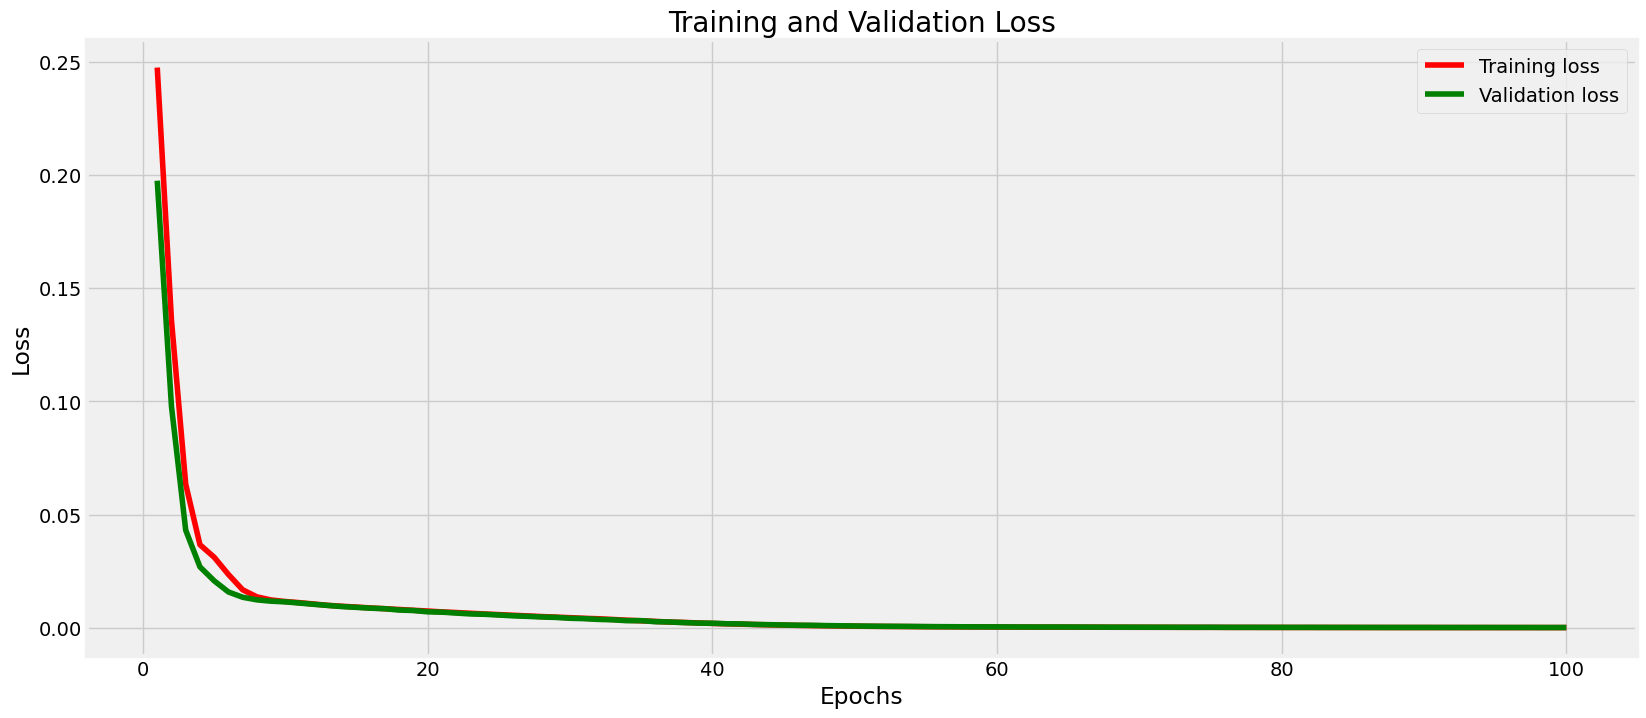

In [21]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout
plt.show()


In [22]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [23]:
r2_score(y_test,y_pred)

0.9962905142816595

In [24]:
mean_squared_error(y_test,y_pred)

7.08213920532253e-05

In [25]:
import joblib  # ✅ Ensure joblib is imported
import tensorflow as tf
# Save Model and Scaler
joblib.dump(model, "model1.pkl")
joblib.dump(scaler, "scaler1.pkl")

print("Model and Scaler Saved!")

Model and Scaler Saved!


In [26]:
!pip install joblib 

In [27]:
import os
print(os.listdir())  # Lists all files in the current directory


['.anaconda', '.arduinoIDE', '.cache', '.chocolatey', '.conda', '.condarc', '.continuum', '.dotnet', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.vscode', 'anaconda_projects', 'AppData', 'Application Data', 'BioViT.ipynb', 'BioViT.py', 'car_purchase.ipynb', 'car_purchase.py', 'car_purchase_model.h5', 'Cookies', 'Local Settings', 'model', 'model.pkl', 'model1.pkl', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{6bdebd81-ab28-11ed-adba-d190b2232025}.TxR.0.regtrans-ms', 'NTUSER.DAT{6bdebd81-ab28-11ed-adba-d190b2232025}.TxR.1.regtrans-ms', 'NTUSER.DAT{6bdebd81-ab28-11ed-adba-d190b2232025}.TxR.2.regtrans-ms', 'NTUSER.DAT{6bdebd81-ab28-11ed-adba-d190b2232025}.TxR.blf', 'NTUSER.DAT{6bdebd82-ab28-11ed-adba-d190b2232025}.TM.blf', 'NTUSER.DAT{6bdebd82-ab28-11ed-adba-d190b2232025}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{6bdebd82-ab28-11ed-adba-d190b2232025}.TMContainer00000000000000000002.regtrans-ms', 'ntus

In [28]:
import os

# Define the save directory
save_dir = r"H:\New folder"
os.makedirs(save_dir, exist_ok=True)  # Ensure the folder exists

# Save model in Keras format (Recommended)
save_path_keras = os.path.join(save_dir, "car_price_modelui.keras")
model.save(save_path_keras)

# Save model in HDF5 format (if needed)
save_path_h5 = os.path.join(save_dir, "car_price_modelui.h5")
model.save(save_path_h5)

# Save model in TensorFlow's SavedModel format
save_path_tf = os.path.join(save_dir, "car_price_model_saved")
model.export(save_path_tf)  # Use export() instead of save()


INFO:tensorflow:Assets written to: H:\New folder\car_price_model_saved\assets


INFO:tensorflow:Assets written to: H:\New folder\car_price_model_saved\assets


Saved artifact at 'H:\New folder\car_price_model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2268502422544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2268771836432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2268771833744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2268771835088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2268771837008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2268771834704: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [29]:
import nbconvert

# Convert notebook to script
nbconvert.export(nbconvert.ScriptExporter(), 'car_purchase.ipynb')


('#!/usr/bin/env python\n# coding: utf-8\n\n# In[2]:\n\n\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import r2_score,mean_squared_error\nimport warnings\nwarnings.filterwarnings("ignore")\n\n\n# In[3]:\n\n\ndf = pd.read_csv(r"H:\\New folder\\car_purchasing.csv",encoding=\'ISO-8859-1\')\n\ndf.head()\n\n\n# In[4]:\n\n\ndf.drop(columns=[\'customer name\',\'customer e-mail\',\'country\'],inplace=True)\n\n\n# In[5]:\n\n\ndf.head()\n\n\n# In[6]:\n\n\ndf.info()\n\n\n# In[7]:\n\n\ndf.columns\n\n\n# In[8]:\n\n\ndf.describe\n\n\n# In[9]:\n\n\ndf.isnull().any()\n\n\n# In[10]:\n\n\ndf.duplicated()\n\n\n# In[11]:\n\n\ndf.corr()\n\n\n# In[12]:\n\n\nx=df.drop("car purchase amount",axis=1)#features\ny=df[["car purchase amount"]]#target\n\

In [30]:
jupyter nbconvert --to script car_purchase.ipynb


SyntaxError: invalid syntax (1532188320.py, line 1)